## MOBILENET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG


from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

2.13.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 4097 images belonging to 2 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 3840 images belonging to 2 classes.


In [5]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision(),tensorflow.keras.metrics.Recall()])
  return model
     

input_shape = 224, 224, 3
n_classes = 2

K.clear_session()
model = mobilenet(input_shape, n_classes)
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128   

                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 512)       262656    
                                                                 
 batch_normalization_16 (Ba  (None, 14, 14, 512)       2048      
 tchNormalization)                                               
                                                                 
 re_lu_16 (ReLU)             (None, 14, 14, 512)       0         
                                                                 
 depthwise_conv2d_8 (Depthw  (None, 14, 14, 512)       5120      
 iseConv2D)                                                      
                                                                 
 batch_normalization_17 (Ba  (None, 14, 14, 512)       2048      
 tchNormalization)                                               
                                                                 
 re_lu_17 (ReLU)             (None, 14, 14, 512)       0         
          

In [6]:
model_path = "MOBILENET.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 35
batch_size = 224

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/35
18/18 [==============================] - ETA: 0s - loss: 0.7312 - accuracy: 0.5451 - precision: 0.5451 - recall: 0.5451
Epoch 1: accuracy improved from -inf to 0.54514, saving model to MOBILENET.h5
18/18 [==============================] - 142s 6s/step - loss: 0.7312 - accuracy: 0.5451 - precision: 0.5451 - recall: 0.5451 - val_loss: 0.6921 - val_accuracy: 0.5239 - val_precision: 0.5239 - val_recall: 0.5239
Epoch 2/35
18/18 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.6233 - precision: 0.6233 - recall: 0.6233
Epoch 2: accuracy improved from 0.54514 to 0.62326, saving model to MOBILENET.h5
18/18 [==============================] - 91s 5s/step - loss: 0.7092 - accuracy: 0.6233 - precision: 0.6233 - recall: 0.6233 - val_loss: 0.6970 - val_accuracy: 0.5129 - val_precision: 0.5129 - val_recall: 0.5129
Epoch 3/35
18/18 [==============================] - ETA: 0s - loss: 0.6172 - accuracy: 0.7031 - precision: 0.7031 - recall: 0.7031
Epoch 3: accuracy improve

18/18 [==============================] - ETA: 0s - loss: 0.1801 - accuracy: 0.9358 - precision: 0.9358 - recall: 0.9358
Epoch 21: accuracy improved from 0.92535 to 0.93576, saving model to MOBILENET.h5
18/18 [==============================] - 98s 5s/step - loss: 0.1801 - accuracy: 0.9358 - precision: 0.9358 - recall: 0.9358 - val_loss: 0.7447 - val_accuracy: 0.5165 - val_precision: 0.5165 - val_recall: 0.5165
Epoch 22/35
18/18 [==============================] - ETA: 0s - loss: 0.1165 - accuracy: 0.9566 - precision: 0.9566 - recall: 0.9566
Epoch 22: accuracy improved from 0.93576 to 0.95660, saving model to MOBILENET.h5
18/18 [==============================] - 107s 6s/step - loss: 0.1165 - accuracy: 0.9566 - precision: 0.9566 - recall: 0.9566 - val_loss: 0.6937 - val_accuracy: 0.4890 - val_precision: 0.4890 - val_recall: 0.4890
Epoch 23/35
18/18 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9201 - precision: 0.9201 - recall: 0.9201
Epoch 23: accuracy did not im

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

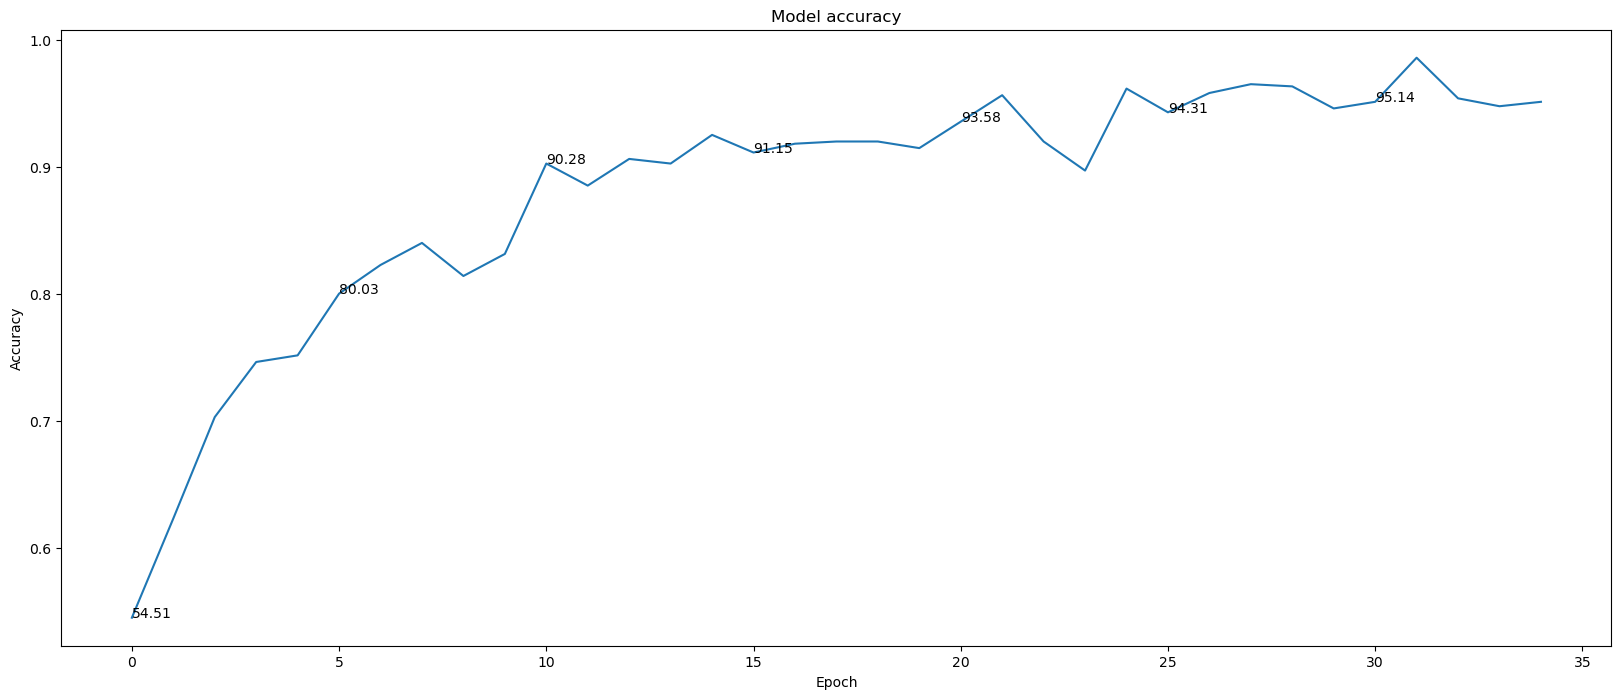

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

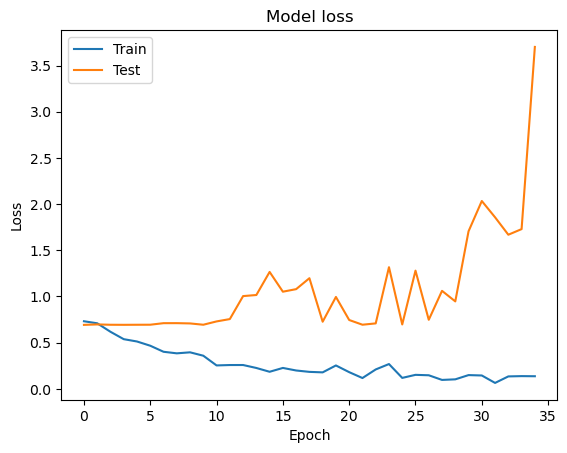

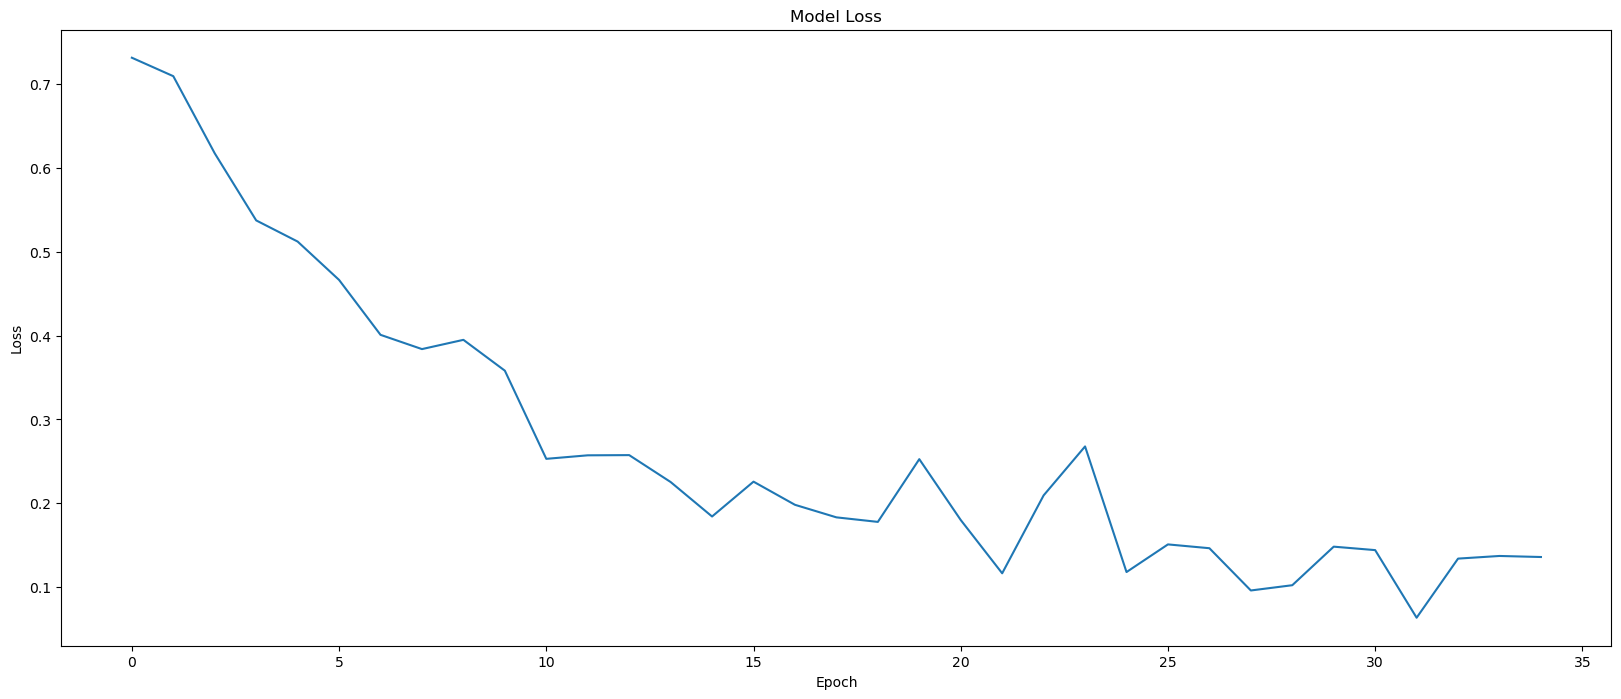

In [11]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])



plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

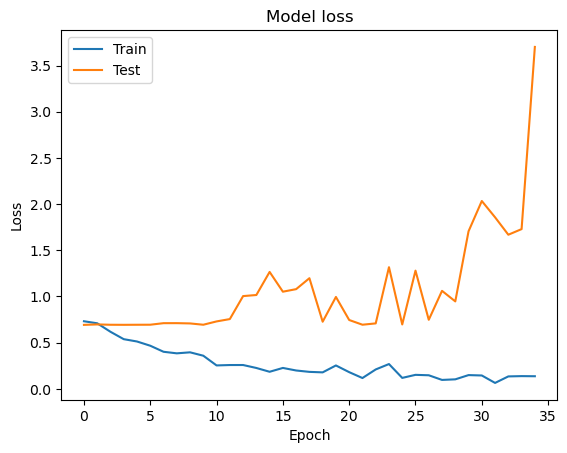

In [12]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()

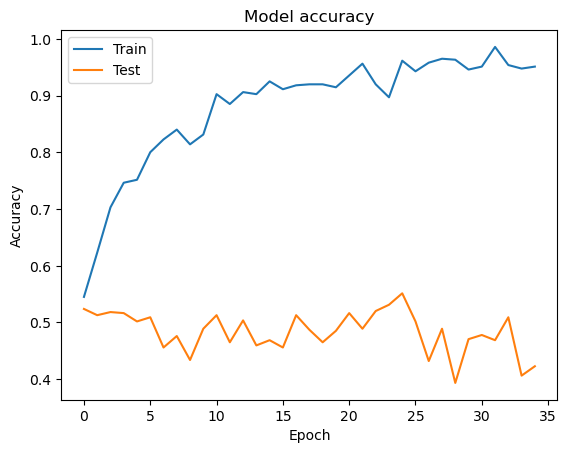

In [13]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()